In [1]:
import numpy as np 
import pandas as pd 
import re 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score

In [187]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [188]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data pre-processing

In [189]:
#load the data set to the data franme 

df= pd.read_csv('train.csv')

In [190]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [191]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [192]:
# 1: fake_news, 0:real_news
#counting the number of missing values

df.isnull().sum()



id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [194]:
df['author'].unique()

array(['Darrell Lucus', 'Daniel J. Flynn', 'Consortiumnews.com', ...,
       'D. Samuelson', 'Judge Andrew Napolitano',
       'Michael J. de la Merced and Rachel Abrams'], dtype=object)

In [195]:
#I'm choosing to replace null with empty string 

df=df.fillna('')

In [196]:
# merging the auther name and news title

df['content']= df['author'] + ' '+ df['title']

In [197]:
#seperating the data and lable columns

X = df.drop('label',axis=1)
y= df['label']

In [26]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [198]:

from sklearn.preprocessing import OrdinalEncoder

# Assuming you have a DataFrame named 'df' with 'Author', 'Title', and 'Text' columns

# Create a new column by combining 'Author', 'Title', and 'Text' columns
df['Combined'] = df['author'] + ' ' + df['title'] + ' ' + df['text']

# Calculate the count of each combined value
combined_counts = df['Combined'].value_counts().reset_index()

# Rename the columns
combined_counts.columns = ['Combined', 'Combined_Count']

# Merge the counts back into the original DataFrame
df = pd.merge(df, combined_counts, on='Combined', how='left')

# Use OrdinalEncoder to encode the 'Combined' column
encoder = OrdinalEncoder()
df['Combined_Encoded'] = encoder.fit_transform(df[['Combined']])

# Print the updated DataFrame
print(df)


          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [117]:
df.head(3)

,id,title,author,text,label,content,Combined,Combined_Count,Combined_Encoded
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,Darrell Lucus House Dem Aide: We Didn’t Even S...,1,6700.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",1,6467.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,Consortiumnews.com Why the Truth Might Get You...,1,6076.0


In [199]:
df=df.drop(['id','title', 'Combined','Combined_Count','content','text','author'],axis=1)

In [200]:
df

,label,Combined_Encoded
0,1,6700.0
1,0,6467.0
2,1,6076.0
3,1,10826.0
4,1,9187.0
...,...,...
20795,0,10723.0
20796,0,4196.0
20797,0,14069.0
20798,1,2764.0


In [120]:
df.head(5)

,label,Combined_Encoded
0,1,6700.0
1,0,6467.0
2,1,6076.0
3,1,10826.0
4,1,9187.0


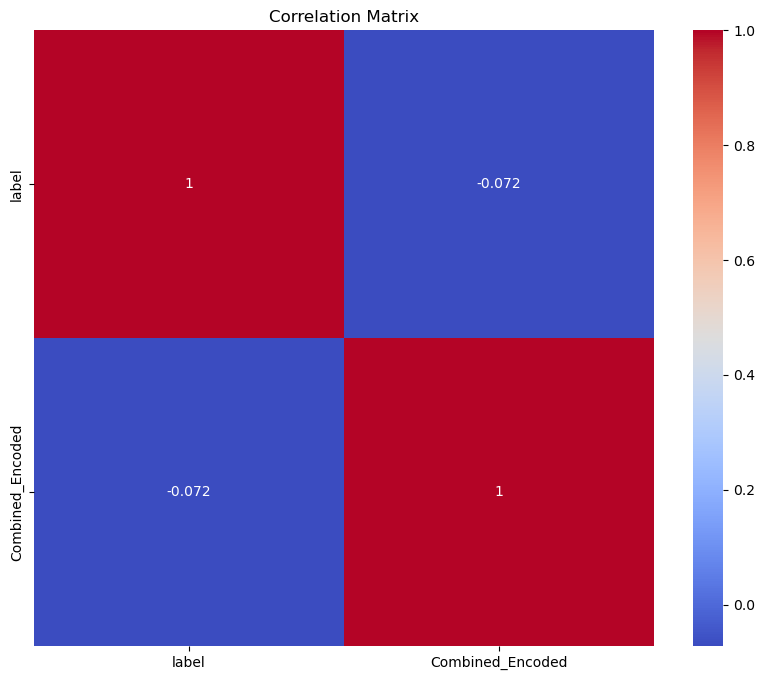

In [78]:
correlation_matrix=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [201]:
X=df.drop('label',axis=1)
y=df['label']


In [122]:
X.head(3)

,Combined_Encoded
0,6700.0
1,6467.0
2,6076.0


In [123]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [124]:
y.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

# Create an instance of the LogisticRegression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)



LogisticRegression()

## MODEL1


In [203]:
#evaluation
# to find the accuracy of training data
y_pred_train = model.predict(X_train)
training_data_accuracy = accuracy_score(y_pred_train,y_train)
print('accuracy of training data: ',training_data_accuracy)

accuracy of training data:  0.4994591346153846


In [204]:

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Evaluate the accuracy of the model
testing_data_accuracy = accuracy_score( y_pred_test,y_test)
print('Accuracy of test data:', testing_data_accuracy)


Accuracy of test data: 0.49927884615384616


## MODEL2

In [206]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()

# Fit the model to the training data
model2.fit(X_train, y_train)



RandomForestClassifier()

In [207]:
y_pred_train = model2.predict(X_train)
training_data_accuracy = accuracy_score(y_pred_train,y_train)
print('accuracy of training data: ',training_data_accuracy)

accuracy of training data:  1.0


In [208]:
# Make predictions on the test data
y_pred_test = model2.predict(X_test)

# Evaluate the accuracy of the model
testing_data_accuracy = accuracy_score( y_pred_test,y_test)
print('Accuracy of test data:', testing_data_accuracy)

Accuracy of test data: 0.9334134615384615


## MODEL3

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df=df.fillna('')

In [4]:
df['content']= df['author'] + ' '+ df['title']

In [5]:
X = df.drop('label',axis=1)
y= df['label']

In [6]:
#stemming : it is the process of reducing a word to its root word 

#eg : actor ,  actress, acting --> act(for better performance)


port_stem = PorterStemmer()

In [7]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ', content)  #replacing char other than alphabet to space 
    stemmed_content = stemmed_content.lower()           #converting all char to lower case
    stemmed_content = stemmed_content.split()           # splitted and convert it to list
    #stemming the words which are not in stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
    

In [8]:
df['content']= df['content'].apply(stemming)

In [9]:
df['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [10]:
X = df['content'].values
y= df['label'].values

In [11]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [12]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [13]:
# converting to numbers

vectorizer = TfidfVectorizer()
# term frequency–inverse document frequency- 
# term frequency- no.of time a word is repeating in a document (importent) count
# inverse document frequency- no.of time a word is repeating in a document(useless) 
vectorizer.fit(X)

X = vectorizer.transform(X)

In [14]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

## MODEL3

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)



In [16]:
# Create an instance of the LogisticRegression model
model3 = LogisticRegression()

# Fit the model to the training data
model3.fit(X_train, y_train)


LogisticRegression()

In [17]:
X_train.size

168288

In [18]:
#evaluation
# to find the accuracy of training data
y_pred_train = model3.predict(X_train)
training_data_accuracy = accuracy_score(y_pred_train,y_train)


In [19]:
print('accuracy of training data: ',training_data_accuracy)

accuracy of training data:  0.9865985576923076


In [20]:


# Make predictions on the test data
y_pred_train = model3.predict(X_test)

# Evaluate the accuracy of the model
testing_data_accuracy = accuracy_score(y_pred_train,y_test)

    


In [21]:
print('accuracy of testing data:', testing_data_accuracy)

accuracy of testing data: 0.9790865384615385
